In [3]:
import sys
print(sys.executable)

/opt/conda/bin/python3.10


In [4]:
import numpy as np
import os
from tensorflow.keras import models, layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import EarlyStopping


In [5]:
import sys
print(sys.version)
print(sys.executable)


3.10.14 | packaged by conda-forge | (main, Mar 20 2024, 12:45:18) [GCC 12.3.0]
/opt/conda/bin/python3.10


In [6]:
# -------------------- Dataset Loading --------------------
train_path = "/kaggle/input/tomatoleaf/tomato/train"
valid_path = "/kaggle/input/tomatoleaf/tomato/val"

In [7]:
sys.setrecursionlimit(10000)  # Increase the recursion limit


In [24]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 10000 files belonging to 10 classes.


In [25]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/tomatoleaf/tomato/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 1000 files belonging to 10 classes.


In [26]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Dropout
from tensorflow.keras.models import Sequential

In [27]:
cnn = tf.keras.models.Sequential()

cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())

cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting


#Output Layer
cnn.add(tf.keras.layers.Dense(units=10,activation='softmax'))



In [28]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
            loss='categorical_crossentropy',
            metrics=['accuracy'])

In [29]:
cnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │        15,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,800,734 (29.76 MB)

 Trainable params: 7,800,734 (29.76 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# -------------------- Training --------------------
# Add EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

tomato_history = cnn.fit(
    x=training_set,
    validation_data=validation_set,
    epochs=10,
    callbacks=[early_stopping]
)

#training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 75ms/step - accuracy: 0.3172 - loss: 1.8799 - val_accuracy: 0.6710 - val_loss: 0.9422
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.7546 - loss: 0.7120 - val_accuracy: 0.7850 - val_loss: 0.5931
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8204 - loss: 0.5025 - val_accuracy: 0.8440 - val_loss: 0.4681
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8640 - loss: 0.3761 - val_accuracy: 0.8630 - val_loss: 0.3970
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9000 - loss: 0.2930 - val_accuracy: 0.8950 - val_loss: 0.3164
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9234 - loss: 0.2262 - val_accuracy: 0.8990 - val_loss: 0.3146
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9366 - loss: 0.1835 - val_accuracy: 0.9050 - val_loss: 0.3286
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 53ms/step - accuracy: 0.9544 - loss: 0.1395 - 

In [31]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9613 - loss: 0.1139
Training accuracy: 0.9652000069618225


In [32]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8975 - loss: 0.3229
Validation accuracy: 0.8989999890327454


In [ ]:
# Get class names
class_names = training_set.class_names
n_classes = len(class_names)
print(f"Number of Classes: {n_classes}, Class Names: {class_names}")


: 

In [34]:
cnn.save('/kaggle/working/tomato_model_3.keras')

In [35]:
tomato_history.history #Return Dictionary of history

{'accuracy': [0.4925999939441681,
  0.7767000198364258,
  0.8363999724388123,
  0.8733000159263611,
  0.9061999917030334,
  0.9241999983787537,
  0.9440000057220459,
  0.9556999802589417,
  0.9570000171661377],
 'loss': [1.4120761156082153,
  0.6438409090042114,
  0.46005508303642273,
  0.35917818546295166,
  0.2738149166107178,
  0.22782394289970398,
  0.16465674340724945,
  0.13645707070827484,
  0.12099036574363708],
 'val_accuracy': [0.6710000038146973,
  0.7850000262260437,
  0.843999981880188,
  0.8629999756813049,
  0.8949999809265137,
  0.8989999890327454,
  0.9049999713897705,
  0.8980000019073486,
  0.8849999904632568],
 'val_loss': [0.9422121047973633,
  0.5930867195129395,
  0.46808233857154846,
  0.39696383476257324,
  0.31640705466270447,
  0.3146141767501831,
  0.3286099135875702,
  0.34723490476608276,
  0.37064364552497864]}

In [43]:
import json
with open('/kaggle/working/tomato_training_hist_3.json','w') as f:
  json.dump(tomato_history.history,f)

In [36]:
print(tomato_history.history.keys()) 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


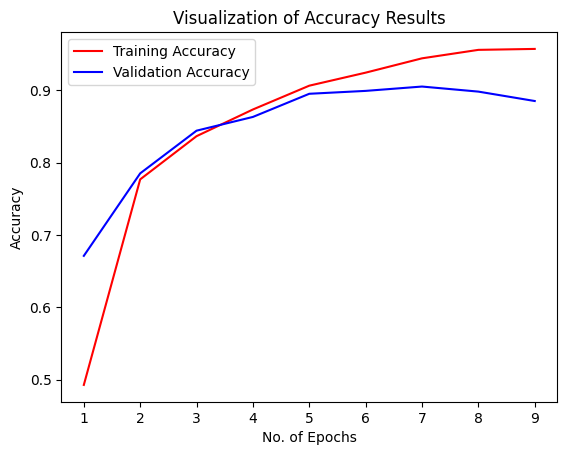

In [37]:
epochs = range(1, 10)  # Now we have 10 epochs

# Plotting training and validation accuracy
plt.plot(epochs, tomato_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, tomato_history.history['val_accuracy'], color='blue', label='Validation Accuracy')

# Labels and Title
plt.xlabel('No. of Epochs')
plt.ylabel('Accuracy')
plt.title('Visualization of Accuracy Results')

# Adding a legend
plt.legend()

# Show the plot
plt.show()


In [39]:
class_name = validation_set.class_names

In [119]:
# # Define your augmentation layers
# test_datagen = tf.keras.Sequential([
#     tf.keras.layers.Rescaling(1./255),  # Rescaling pixel values to [0, 1]
#     tf.keras.layers.RandomFlip("horizontal"),  # Random horizontal flip
#     tf.keras.layers.RandomRotation(0.2),  # Random rotation
#     tf.keras.layers.RandomZoom(0.2),  # Random zoom
# ])

# # Apply the augmentation to the test dataset
# augmented_test_set = test_dataset.map(lambda x, y: (test_datagen(x), y))

# # Resize images to the desired size and adjust batch size
# augmented_test_set = augmented_test_set.map(lambda x, y: (tf.image.resize(x, (128, 128)), y))

# # Set batch size to 1
# augmented_test_set = augmented_test_set.batch(1, drop_remainder=False)

# # Ensure the test set is in the correct shape (no extra dimension)
# augmented_test_set = augmented_test_set.unbatch()  # This flattens the batch dimension


In [41]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/kaggle/input/test-dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 4584 files belonging to 10 classes.


In [42]:
# CLASS MAPPING
# Assuming 'model_class_labels' is the class order from training and 'test_class_labels' is the test directory order
model_class_labels = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 
                      'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
                      'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 
                      'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

test_class_labels = ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 
                     'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 
                     'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus']

# Create a mapping from test class labels to model class labels
class_mapping = {test_class_labels[i]: model_class_labels[i] for i in range(len(test_class_labels))}
print(class_mapping)

{'Tomato___Bacterial_spot': 'Tomato___Bacterial_spot', 'Tomato___Early_blight': 'Tomato___Early_blight', 'Tomato___healthy': 'Tomato___Late_blight', 'Tomato___Late_blight': 'Tomato___Leaf_Mold', 'Tomato___Leaf_Mold': 'Tomato___Septoria_leaf_spot', 'Tomato___Septoria_leaf_spot': 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Spider_mites Two-spotted_spider_mite': 'Tomato___Target_Spot', 'Tomato___Target_Spot': 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus': 'Tomato___Tomato_mosaic_virus', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 'Tomato___healthy'}


In [46]:
# y_pred = cnn.predict(test_set)
# predicted_categories = tf.argmax(y_pred, axis=1)

# PREDICTION
# Predicting on the test set
y_pred = cnn.predict(test_set)

# Getting the predicted class index (for categorical prediction)
predicted_indices = tf.argmax(y_pred, axis=1)

# Mapping the predicted indices to class labels using the class_mapping
predicted_class_labels = [model_class_labels[idx] for idx in predicted_indices]

# Show the predicted class labels
#print("Predicted Class Labels: ", predicted_class_labels)

4584/4584 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step


In [47]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [48]:
Y_true

<tf.Tensor: shape=(4584,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [50]:
predicted_indices

<tf.Tensor: shape=(4584,), dtype=int64, numpy=array([0, 0, 0, ..., 9, 9, 9])>

In [51]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_indices)

In [52]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_indices,target_names=class_name))

                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.92      0.98      0.95       425
                        Tomato___Early_blight       0.66      0.88      0.76       480
                         Tomato___Late_blight       0.87      0.92      0.89       462
                           Tomato___Leaf_Mold       0.91      0.91      0.91       470
                  Tomato___Septoria_leaf_spot       0.86      0.87      0.86       436
Tomato___Spider_mites Two-spotted_spider_mite       0.93      0.86      0.89       435
                         Tomato___Target_Spot       0.92      0.64      0.76       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.93      0.99      0.96       490
                 Tomato___Tomato_mosaic_virus       0.92      0.85      0.88       448
                             Tomato___healthy       0.98      0.90      0.94       481

                                     accu

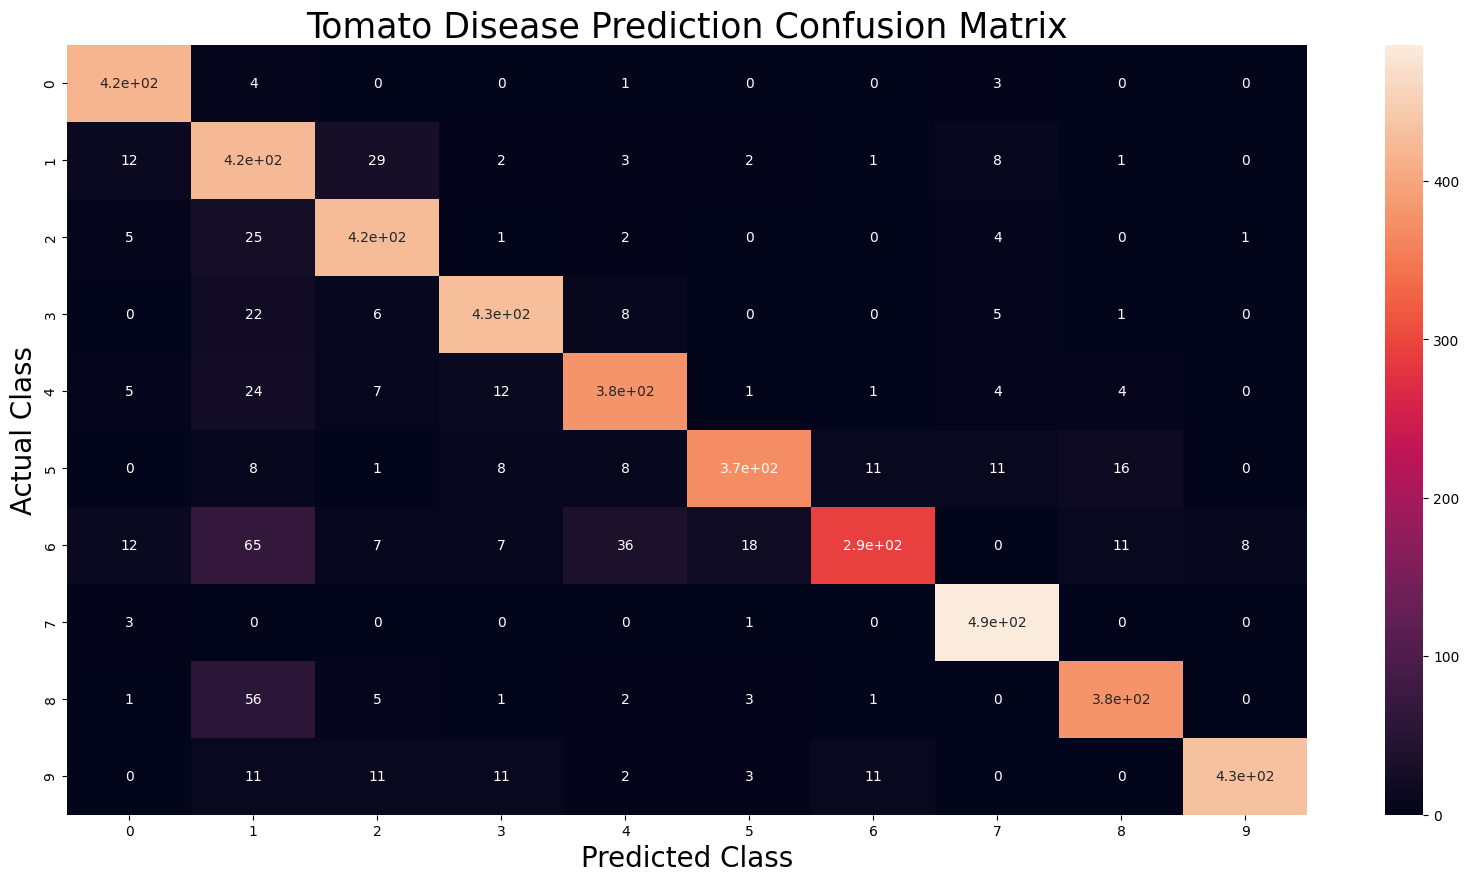

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 10))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Tomato Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()

In [55]:
# Save the trained model
cnn.save('/kaggle/working/tomato_trained_model_3.h5')